# ORIE 4580/5580/5581 Assignment 3

#### Students: Yiran Wang (yw2588)

### Github link: https://github.com/w000yiran/ORIE-5581-Homework/blob/main/HW3.ipynb


### Instructions


* Due Friday September 22, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 7 (you can skim through this), and chapters 8 and 9 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell.

Chapter 3 and chapter 4 (up to section 4.5) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [1]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

___
___

## Question 1: Combining LCGs (20 points)

In order to avoid biases, simulations should not use anywhere near the full period of an LCG (otherwise, the random sequence repeats\ldots). For example, a typical traffic simulator may have $10,000$ vehicles, each experiencing thousands of random disturbances, thus needing around $10^7$ random samples per replication -- for this, an LCG using $m=2^{31}-1\approx 2\times 10^9$ is insufficient, as after $100$ replications the sequences get correlated.

One method to combine multiple LCGs to obtain a generator with a longer period is to add a smaller period LCG to it. For example, suppose we have two generators $X_{n+1}  =  (a_1 X_n) \mbox{ mod } m_1$ and $Y_{n+1}  =  (a_2 Y_n) \mbox{ mod } m_2$, with $m_1>m_2$. We can derive a combined generator by setting $Z_n  =  (X_n + Y_n) \mbox{ mod } m_1$. If properly designed, the resulting period can be on the order of $m_1m_2$. We will now study a small example to see how this works.


___
**(a)** Consider two LCGs, $x_{n+1} = (5 x_n) \mod 16$ and $y_{n+1} = (2 y_n) \mod 7$. Starting both with seed $x_0 = y_0 = 1$, plot the sequences $x_n, y_n$ using the clock visualization introduced in class (separate plot for each sequence; you can use and modify the code in Demo-PRNGs.ipynb on Canvas).
___

For the following functions, the class demostration notebook is referenced.

In [2]:
# Functions to visualize LCG sequence on clock (see demo notebook)
def plot_clock_face(m, fig, annotate=False):
    # Plot m points on the unit circle
    for i in range(m):
        theta = 2.0 * np.pi * i / m
        plt.plot(np.sin(theta), np.cos(theta), 'rs', markersize = 10)
        if annotate:
            plt.annotate(str(i), (np.pi/2 - theta, 1.05), xycoords='polar')

def plot_clock_path(m, x, fig, color='y'):
    # Plot the seed node
    theta_0 = 2.0 * np.pi * (x[0] * (m + 1) - 1) / m
    plt.plot(np.sin(theta_0), np.cos(theta_0), 'gs', markersize = 10)

    # Plot the path of the LCG sequence
    for i in range(len(x) - 1):
        theta_start = 2.0 * np.pi * (x[i] * (m + 1) - 1) / m
        theta_end = 2.0 * np.pi * (x[i + 1] * (m + 1) - 1) / m
        x_start = np.sin(theta_start)
        y_start = np.cos(theta_start)
        del_x = np.sin(theta_end) - np.sin(theta_start)
        del_y = np.cos(theta_end) - np.cos(theta_start)
        if abs(del_x) > 0 or abs(del_y) > 0:
            plt.arrow(x_start, y_start, del_x, del_y,
                      length_includes_head=True, head_width=0.05, head_length=0.1, fc=color, ec=color)

def LCG(n, m=2**31-1, a=1103515245, c=12345, seed=1):
    # Initialize an array to store the generated pseudorandom numbers
    output = np.zeros(n)

    x = seed
    for i in range(n):
        # Calculate the pseudorandom number and normalize it to [0, 1)
        output[i] = (x + 1.0) / (m + 1.0)

        # Update the LCG state using the specified parameters
        x = (a * x + c) % m

    return output

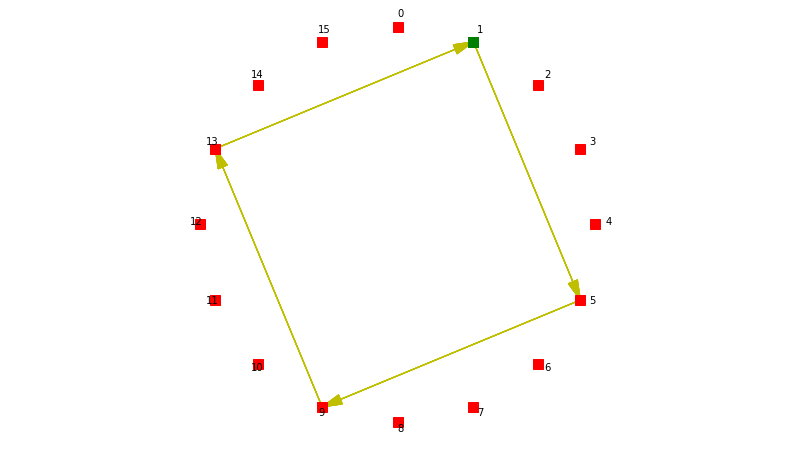

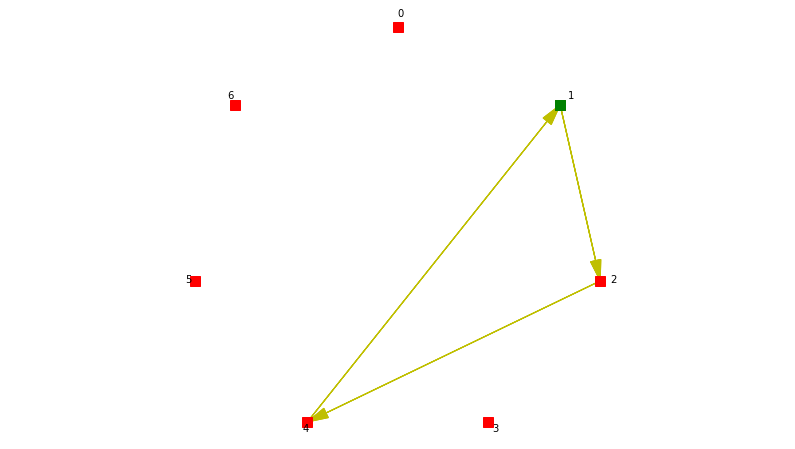

In [3]:
# Ans
fig1 = plt.figure(figsize=(14,8))
x1 = LCG(n=17,m=16,a=5,c=0,seed = 1)

plot_clock_face(16,fig1,annotate = True)
plot_clock_path(16,x1,fig1)
plt.axis('equal')
plt.axis('off')
plt.show()

fig2 = plt.figure(figsize=(14,8))
x2 = LCG(n=8,m=7,a=2,c=0,seed = 1)

plot_clock_face(7,fig2,annotate = True)
plot_clock_path(7,x2,fig2)
plt.axis('equal')
plt.axis('off')
plt.show()

___
**(b)** Next, define a combined LCG as $z_{n} = (x_n+y_n) \mod 16$. Starting both the base LCGs with seed $x_0 = y_0 = 1$, plot the sequence $z_n$ using the clock visualization given in class.
___

In [4]:
# refered to the demo notebook
def twoLCG(n, m1=16, m2=7, a1=5, a2=2, c1=0, c2=0, seed1=1, seed2=1):
    output = np.zeros(n)
    x = seed1
    y = seed2
    z = (x+y) % m1
    for i in range(n):
        # Calculate the pseudorandom number and normalize it to [0, 1)
        output[i] = (z + 1.0)/(m1 + 1.0)

        # Update the LCG state using the specified parameters
        x = (a1 * x + c1) % m1
        y = (a2 * y + c2) % m2
        z = (x + y) % m1

    return output

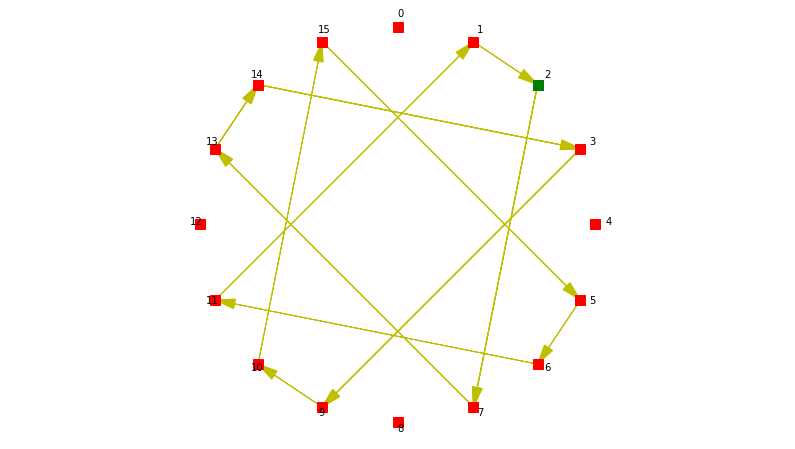

In [5]:
# Ans
m1 = 16
m2 = 7
a1 = 5
a2 = 2
c1 = 0
c2 = 0
seed1 = 1
seed2 = 1

fig = plt.figure(figsize=(14,8))
z = twoLCG(n=m1+2,m1=m1,m2=m2,a1=a1,a2=a2,c1=c1,c2=c2,seed1=seed1,seed2 = seed2)

plot_clock_face(m1,fig,annotate = True)
plot_clock_path(m1,z,fig)
plt.axis('equal')
plt.axis('off')
plt.show()

___
**(c)** What are the periods of the pseudo-random sequences $x_n, y_n$ and $z_n$?
___

### Ans.


The periods for $x_n$, $y_n$, and $z_n$ are $4$, $3$, $12$ respectively, as counted in graphs shown in (a) and (b).

___
___
## Question 2: inverting cdfs (25 pts)

In class, we defined $F^{-1}(y)$ for a continuous increasing cdf $F(x)$ as the unique $x$ such that $F(x) = y$ (for $y\in[0,1]$). More generally, for any cdf $F$ we can use the inversion method based on its generalized inverse or *pseudoinverse*:
	$$F^{-1}(y) = \inf\{x|F(x)\geq y\}$$
	(where $\inf$ denotes the \href{https://en.wikipedia.org/wiki/Infimum_and_supremum}{infimum}; if you have not seen this before, treat it as minimum).


___
**(a)** Find the pseudoinverse $F^{-1}(y)$ for the following mixed (discrete/continuous) cdf
	$$F(x)=
	\begin{cases}
	0 & \mbox{for $x < 0$}\\
	x & \mbox{for $0 \leq x < \frac{1}{2}$}, \\
	\frac{1}{2} & \mbox{for $\frac{1}{2}\leq x < 1$}, \\
	1 & \mbox{for $x\geq 1$}
	 \end{cases}$$
___

### Ans.


$$F^{-1}(y)=
\begin{cases}
    y & \mbox{for $0 \leq y \leq \frac{1}{2}$}, \\
    1 & \mbox{for $\frac{1}{2} < y \leq 1$}
\end{cases}$$

___
**(b)** Use the above definition to get an inversion algorithm for the $Geometric(p)$ distribution (with pmf $p(k) = p(1-p)^{k-1}\,\forall\,k\in\{1,2,3,\ldots\}$). Implement this, and generate and plot the histogram of 1000 samples from a $Geometric(0.42)$ distribution.
(For this, it may be useful for you to first understand how the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) library works, and in particular, how it provides methods to compute various statistics for many different random variables, including the [geometric r.v.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom))
___

$F(k)=\mathbb P(X \leq k) = \sum_{i=1}^kp(i)=p\sum_{i=1}^k (1-p)^{i-1}=p \frac{1-(1-p)^k}{1-(1-p)}=1-(1-p)^k$

$F^{-1}(y)=\lceil log_{1-p} (1-y)⌉=\lceil\frac{ln(1-y))}{ln(1-p)}⌉$

The algorithm is organized as followed:
* randomly generate $U \sim Unif(0,1)$
* $x = F^{-1}(U)$ is a sample that we favor
* repeat the process, until we get $N$ samples


In [6]:
def inverseCDF_2b(x,p):
  result = np.log(1-x)/np.log(1-p)
  return np.ceil(result)

def generate_2b(N,p):
  u = np.random.uniform(0,1,N)
  x = inverseCDF_2b(u,p)
  return x


(array([0.47142857, 0.09357143, 0.09428571, 0.02214286, 0.01571429,
        0.00928571, 0.00428571, 0.00285714, 0.        , 0.00071429]),
 array([ 1. ,  2.4,  3.8,  5.2,  6.6,  8. ,  9.4, 10.8, 12.2, 13.6, 15. ]),
 <BarContainer object of 10 artists>)

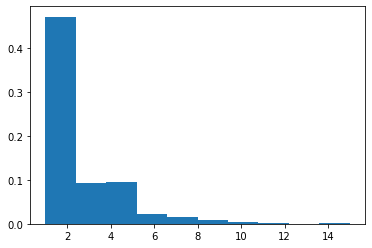

In [7]:
samples_2b = generate_2b(1000,0.42)
plt.hist(samples_2b,density=True)

___
**(c)** The p.d.f. of the random variable $X$ is given by
	$$
	f(x) =
	\begin{cases}
		e^{x-2} & \text{for }0 \leq x \leq 2, \\
		e^{-x} & \text{for }x > 2, \\
		0 & \text{otherwise,}
	\end{cases}
	$$
	Describe and implement an inversion algorithm to generate samples of $X$. Generate 1,000 samples and plot a histogram. Compare the histogram and the p.d.f.


___

### Ans.

$$
	F(x) =
    \begin{cases}
      e^{x-2}-e^{-2} & \text{for }0 \leq x \leq 2, \\
      1-e^{-x} & \text{for }x > 2, \\
      0 & \text{otherwise}
    \end{cases}
$$

$$
	F^{-1}(y) =
    \begin{cases}
      2+ln(y+e^{-2}) & \text{for }0 \leq y \leq 1-e^{-2}, \\
      -ln(1-y) & \text{for }1-e^{-2} < y \leq 1
    \end{cases}
$$

The algorithm is organized as followed:
* randomly generate $U \sim Unif(0,1)$
* calculate $x = F^{-1}(U)$:
  * if $0 \leq U \leq 1-e^{-2}: x = 2+ln(U+e^{-2})$
  * if $1-e^{-2} < U \leq 1: x = -ln(1-U)$
* repeat the process, until we get $N$ samples

In [8]:
def inverseCDF_2c(x):
  result = []
  for i in range(len(x)):
    if x[i]<1-np.exp(-2):
      result.append(2+np.log(x[i]+np.exp(-2)))
    else:
      result.append(-np.log(1-x[i]))
  return result

def generate_2c(N):
  u = np.random.uniform(0,1,N)
  x = inverseCDF_2c(u)
  return x

def PDF_2c(x):
  result=np.zeros(len(x))
  for i in range(len(x)):
    if x[i]<=2 and x[i]>=0:
      result[i]=(np.exp(x[i]-2))
    elif x[i]>2:
      result[i]=(np.exp(-x[i]))
  return result

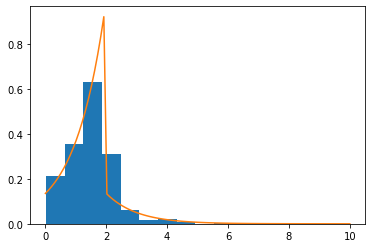

In [9]:
x = np.linspace(0,10,100)
y = PDF_2c(x)

samples_2c = generate_2c(1000)
plt.hist(samples_2c,density=True)
plt.plot(x,y)
plt.show()

The histogram with pdf function is plotted above. In general, the patterns align. The density largely increases between $(0,2)$, and then descreases sharply at $2$, and decreases slowly afterwards.

___
___

## Question 3: Acceptance-Rejection (25 pts)

Let the random variable $X$ have density
$$f(x) = \begin{cases} (5 x^4 + 4x^3 + 3x^2+1)/4  & \text{ for } 0 \leq x \leq 1, \\
0 & \text{ otherwise. } \end{cases}$$

___
**(a)** Give an acceptance-rejection algorithm to generate samples of
	$X$.

___

### Ans.


The algorithm is generally as followed:
* generate $U_1$ and $U_2$ independently from $Unif(0,1)$ and $Unif(0,M)$ respectively
  * in this case, $M = max(f(x))=3.25$
* if $U_2<f(U_1)$, we accept $U_1$
* repeat the above process until we get $N$ samples.

In [10]:
# generate X, U
# if U<f(x), accept
# else, reject

def f_3a(x):
  result = []
  for i in range(len(x)):
    if 0 <= x[i] and x[i]<=1:
      result.append((5*x[i]**4+4*x[i]**3+3*x[i]**2+1)/4)
    else:
      result.append(0)
  return result

def accRej_3a(N):
  X = []
  i = 0
  while len(X) < N:
    i += 1
    u1 = np.random.uniform(0,1,1)
    fu1 = (5*u1[0]**4+4*u1[0]**3+3*u1[0]**2+1)/4
    u2 = np.random.uniform(0,3.25,1)
    if u2 <= fu1:
      X.append(u1[0])

  return i*2,X

In [12]:
numbers_3a,samples_3a = accRej_3a(10000)
numbers_3a

65168

___
**(b)** On average, how many samples from the uniform distribution over $[0, 1]$ would your acceptance-rejection algorithm need in order to generate one sample of $X$?
___

### Ans.


Because in (a) we generate using $M=3.25$, the expected numbers should be $2M=6.5$.

Also, according to the simulation in (a), the numbers of generations need for one sample of $X$ is approximately $6.5$, which aligns with theory.

___
**(c)** Use your algorithm in (a) to generate 2,500 samples of $X$. Note that this will require more than 2500 uniform random variables.

Plot a histogram of your sample   and compare it against the true pdf.
___


16588


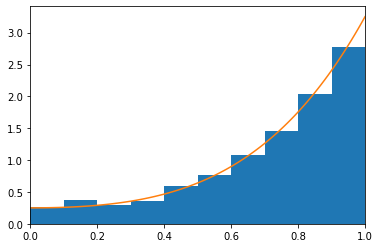

In [13]:
x = np.linspace(0,1,100)
y = f_3a(x)

numbers_3a,samples_3a = accRej_3a(2500)
print(numbers_3a)

plt.hist(samples_3a,density=True)
plt.plot(x,y)
plt.xlim(0,1)
plt.show()

In order to generate $2500$ samples, $16032$ uniform samples were generated.

According to the histogram, the pdf represents the pdf very well with similar pattern.

___
___

## Question 4: Generalized Acceptance-Rejection (30 pts)

We want to generate a $\mathcal{N}(0,1)$ rv $X$, with pdf
$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}} $,
using generalized acceptance-rejection.

___

**(a)** First, suppose we choose the proposal distribution to be a \emph{Laplace} (i.e., two-sided Exponential) distribution, which has pdf $g(x) = e^{-|x|}/2$. Describe (and implement) an inversion algorithm to get samples from this distribution.
___

$$G(x)=\int_{-\infty}^{x}\frac{e^{-|t|}}{2}dt=
	\begin{cases}
    \frac{e^x}{2} & \mbox{for $x \leq 0$},\\
    1-\frac{e^{-x}}{2} & \mbox{for $x > 0$}
  \end{cases}$$

$$G^{-1}(y)=
	\begin{cases}
    ln(2y) & \mbox{for $0 \leq y \leq \frac{1}{2}$},\\
    -ln(2(1-y)) & \mbox{for $\frac{1}{2} < y < 1$}
  \end{cases}$$

The algorithm of generating $x\sim g(x)$ is similar to the previous inversion algorithms.

* randomly generate $U \sim Unif(0,1)$
* calculate $x = G^{-1}(U)$:
  * if $0 \leq U \leq \frac{1}{2}: x = ln(2x)$
  * if $\frac{1}{2} < U < 1: x = -ln(2-2U)$
* repeat the process, until we get $N$ samples

In [14]:
def inverseG_4a(x):
  result = []
  for i in range(len(x)):
    if (x[i] <= 0.5):
      result.append(np.log(2*x[i]))
    else:
      result.append(-np.log(2-2*x[i]))
  return result

def generate_4a(N):
  u = np.random.uniform(0,1,N)
  x = inverseG_4a(u)
  return x

(array([0.00446845, 0.02949176, 0.0947311 , 0.29313019, 0.32172826,
        0.09651848, 0.03574758, 0.01429903, 0.00178738, 0.00178738]),
 array([-4.57153   , -3.45257328, -2.33361656, -1.21465984, -0.09570312,
         1.0232536 ,  2.14221033,  3.26116705,  4.38012377,  5.49908049,
         6.61803721]),
 <BarContainer object of 10 artists>)

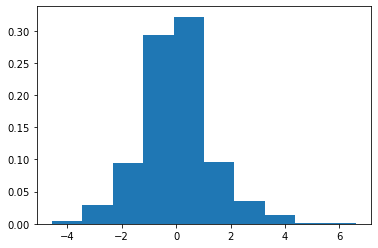

In [15]:
samples_4a = generate_4a(1000)
plt.hist(samples_4a,density=True)

___
**(b)** Determine the smallest $k$ such that $kg(x)\geq f(x)\,\forall\,x\in\mathbb{R}$. Using this, propose (and implement) an acceptance-rejection algorithm for sampling $X\sim\mathcal{N}(0,1)$, and compute the expected number of samples needed for generating each sample.
___

### Ans.

Because $g(x)$ is positive, we evaluate the maximum of $\frac{f(x)}{g(x)}$.

$$
\frac{f(x)}{g(x)}=\frac{\frac{e^{-x^2/2}}{\sqrt{2\pi}}}{\frac{e^{-|x|}}{2}}=\frac{2}{\sqrt{2\pi}}e^{-x^2/2+|x|} \leq \frac{2}{\sqrt{2\pi}}e^{1/2}
$$

Hence, $k = \frac{2e^{\frac{1}{2}}}{\sqrt{2\pi}}=1.3155$.

The expected number of samples needed would then be $2k = 2.6310$.

The algorithm would be as followed:
* we generate a sample $X$ from $g$ as in (a)
  * generate $U \sim Unif(0,1)$ and accepting $X$ if $U < f(X) /[kg(X)]$.
* If $X$ is rejected, a new candidate is sampled from $g$ and the acceptance test applied again.
* The process repeats until the acceptance test is passed; the accepted candidate is a sample from $f$

___
**(c)** Generate $1000$ samples from your method in part (b), and plot the histogram of the samples. Also report the average and 95\% CI for the number of $U[0,1]$ samples needed to generate the $1000$ samples.
___

In [16]:
def fOverG_4c(x):
  return np.exp(-x**2/2+np.abs(x)-0.5)

def generate_4c(N):
  samples = []
  i = 0

  while len(samples) < N:
    i +=1
    x = generate_4a(1)[0]
    u = np.random.uniform(0,1)
    if u <= fOverG_4c(x):
      samples.append(x)

  return i*2,samples

(array([0.00559446, 0.02237782, 0.11328772, 0.23776435, 0.3636396 ,
        0.36084237, 0.19860317, 0.07832238, 0.01538475, 0.00279723]),
 array([-3.50137692, -2.78638329, -2.07138965, -1.35639602, -0.64140238,
         0.07359125,  0.78858489,  1.50357853,  2.21857216,  2.9335658 ,
         3.64855943]),
 <BarContainer object of 10 artists>)

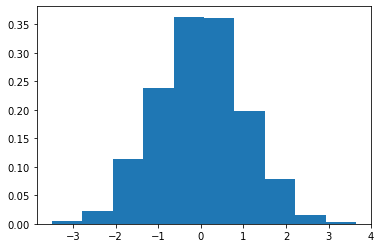

In [17]:
numbers_4c,samples_4c = generate_4c(1000)
plt.hist(samples_4c, density=True)

In [18]:
# Also report the average and 95% CI for the number of  𝑈[0,1]  samples needed to generate the  1000  samples.
numbers = np.zeros(100)
for i in range(100):
  numbers[i],samples=generate_4c(1000)

#numbers

In [19]:
mean_no = np.mean(numbers/1000)
sd_no = np.std(numbers/1000)

confint_lo = mean_no-1.96*sd_no
confint_hi = mean_no+1.96*sd_no

print("The average numbers: ",mean_no)
print("The confidence interval: ", [confint_lo,confint_hi])

The average numbers:  2.6298000000000004
The confidence interval:  [2.5445321153071103, 2.7150678846928904]


The average number needed to generate $1000$ samples is simulated to be $2.635$, which aligns with our computation on (b).

The $95$% confidence interval generated is $[2.5591, 2.7105]$.

___
**(d)** Now, suppose instead we choose the proposal distribution to be a Cauchy  distribution with pdf $g(x) = \frac{1}{\pi(1+x^2)}$. Describe and implement an inversion algorithm to get samples from this distribution, and plot the histogram of 1000 samples from this distribution.
___

$$G(x)=\int_{-\infty}^{x}\frac{1}{\pi(1+t^2)}dt=\frac{1}{\pi}(tan^{-1}(x)-(-\frac{1}{2}\pi))=\frac{tan^{-1}(x)}{\pi}+\frac{1}{2}
$$

$$G^{-1}(y)=tan(\pi(y-\frac{1}{2}))
$$

The inversion algorithm for generating $g(x)=\frac{1}{\pi(1+x^2)}$ is as followed:
* generate $U \sim Unif(0,1)$
* the sample $x=G^{-1}(U)=tan(\pi(U-\frac{1}{2}))$

In [20]:
def inverseCDF_4d(x):
  result = np.tan((x-0.5)*np.pi)
  return result

def generateG_4d(N):
  u = np.random.uniform(0,1,N)
  x = inverseCDF_4d(u)
  return x

(array([1.07660478e-05, 2.15320955e-05, 2.15320955e-05, 1.02815756e-02,
        3.98343767e-04, 1.07660478e-05, 0.00000000e+00, 1.07660478e-05,
        0.00000000e+00, 1.07660478e-05]),
 array([-363.59434826, -270.70975202, -177.82515578,  -84.94055955,
           7.94403669,  100.82863292,  193.71322916,  286.59782539,
         379.48242163,  472.36701786,  565.2516141 ]),
 <BarContainer object of 10 artists>)

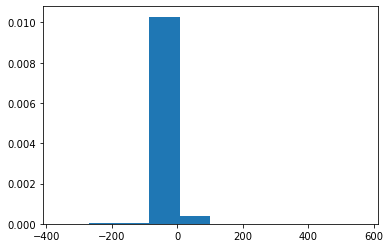

In [21]:
samples_4d = generateG_4d(1000)
plt.hist(samples_4d,density=True)
#plt.xlim(-50,50)

Although observing the weird pattern, the graph actually aligns with the nature of tangent functions.

___
**(e)** Repeat parts $(b)$ and $(c)$ for this proposal distribution.
___

### Ans.

### We first compute $k$ for the Acceptance-Rejection method
$
\frac{f(x)}{g(x)}=\frac{\frac{e^{-x^2/2}}{\sqrt{2\pi}}}{\frac{1}{\pi(1+x^2)}}=\sqrt{\frac{\pi}{2}}(1+x^2)e^{-x^2/2}
$

Let $h(m)=(1+m)e^{-m/2}$, where $m \geq 0$.

The derivative $h'(m)=e^{-m/2}+(1+m)e^{-m/2}\frac{1}{2}=e^{-m/2}(1-\frac{1+m}{2})$

$h'(m)=0 ⟺ m=1$

Therefore, the maximum of $\frac{f(x)}{g(x)}$ is obtained when $x^2=1$, which yields $k=\frac{f(x)}{g(x)}|_{x^2=1}=\sqrt{\frac{\pi}{2}} (2e^{-0.5})=1.5203$

The expected number of samples needed would then be $2k = 3.0406$.

The algorithm would be as followed:
* we generate a sample $X$ from $g(x)=\frac{1}{\pi(1+x^2)}$ with the inversion method as followed:
  * generate $U \sim Unif(0,1)$
  * the sample $x=G^{-1}(U)=tan(\pi(U-\frac{1}{2}))$
  * the resulting $x \sim g(x)$
* generate $U \sim Unif(0,1)$ and accepting $X$ if $U < f(X) /[kg(X)]$.
  * here, $k=1.5203$
* If $X$ is rejected, a new candidate is sampled from $g$ and the acceptance test applied again.
* The process repeats until the acceptance test is passed; the accepted candidate is a sample from $f$

In [22]:
def fOverG_4e(x):
  result = (1+x**2)*np.exp(-(x**2-1)/2)/2
  return result

def generateF_4e(N):
  X = []
  i = 0
  while len(X) < N:
    i +=1
    x = generateG_4d(1)[0]
    u = np.random.uniform(0,1)

    if u <= fOverG_4e(x):
      X.append(x)
  return 2*i, X

(array([0.00306708, 0.0276037 , 0.07667693, 0.2024271 , 0.31590896,
        0.39565297, 0.32817727, 0.13341786, 0.03680493, 0.01380185]),
 array([-3.4971572 , -2.84507059, -2.19298399, -1.54089739, -0.88881079,
        -0.23672419,  0.41536241,  1.06744901,  1.71953561,  2.37162222,
         3.02370882]),
 <BarContainer object of 10 artists>)

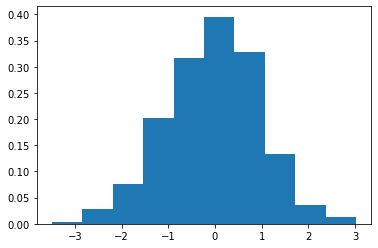

In [23]:
numbers_4e, samples_4e = generateF_4e(1000)
plt.hist(samples_4e,density=True)

The resulting histogram is similar to the graph we obtained in (c).

In [25]:
# Also report the average and 95% CI for the number of  𝑈[0,1]  samples needed to generate the  1000  samples.
numbers = np.zeros(100)
for i in range(100):
  numbers[i],samples=generateF_4e(1000)

mean_no = np.mean(numbers/1000)
sd_no = np.std(numbers/1000)

confint_lo = mean_no-1.96*sd_no
confint_hi = mean_no+1.96*sd_no

print("The average numbers: ",mean_no)
print("The confidence interval: ", [confint_lo,confint_hi])

The average numbers:  3.0441400000000005
The confidence interval:  [2.9236814487857345, 3.1645985512142665]


The average number needed to generate one sample is simulated to be $3.0441$, which aligns with our computation $3.0406$.

The $95$% confidence interval generated is $[2.9237, 3.1646]$.